In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units
import xarray as xr
ds = xr.open_dataset('/home/l/Downloads/BAM1D_PKlast_avaliacao/BAM1D_avaliacao/saidas_figuras/bam1d.nc')
ds


<xarray.Dataset>
Dimensions:  (time: 684, lon: 1, lat: 1, lev: 42)
Coordinates:
  * time     (time) datetime64[ns] 2014-02-15 ... 2014-03-15T11:00:00
  * lon      (lon) float64 300.0
  * lat      (lat) float64 -3.15
  * lev      (lev) float64 1.0 0.9919 0.9827 0.972 ... 0.01236 0.005738 0.002869
Data variables: (12/82)
    topo     (time, lat, lon) float32 ...
    lsmk     (time, lat, lon) float32 ...
    pslc     (time, lat, lon) float32 ...
    divg     (time, lev, lat, lon) float32 ...
    vort     (time, lev, lat, lon) float32 ...
    umes     (time, lev, lat, lon) float32 ...
    ...       ...
    dden     (time, lev, lat, lon) float32 ...
    ddmu     (time, lev, lat, lon) float32 ...
    ddmd     (time, lev, lat, lon) float32 ...
    ddde     (time, lev, lat, lon) float32 ...
    tmfc     (time, lev, lat, lon) float32 ...
    mofc     (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 15:09:10 2023: cdo mergetime GFCTNMC201402150020...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

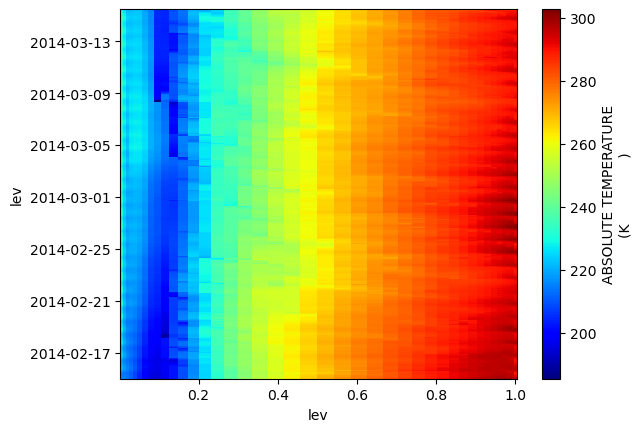

In [18]:
lons = ds.variables['lon'][:]
lats = ds.variables['lat'][:]
time = ds.variables['time'][:]
temp = ds.variables['temp'][:]#-273.15
pres = ds.variables['lev'][:]

ds.close()
lon_0 = lons.mean()
lat_0 = lats.mean()
lon, lat = np.meshgrid(lons, lats)
#xi, yi = m(lon, lat)
ds['temp'].plot(cmap='jet')
ds['lev'].plot()

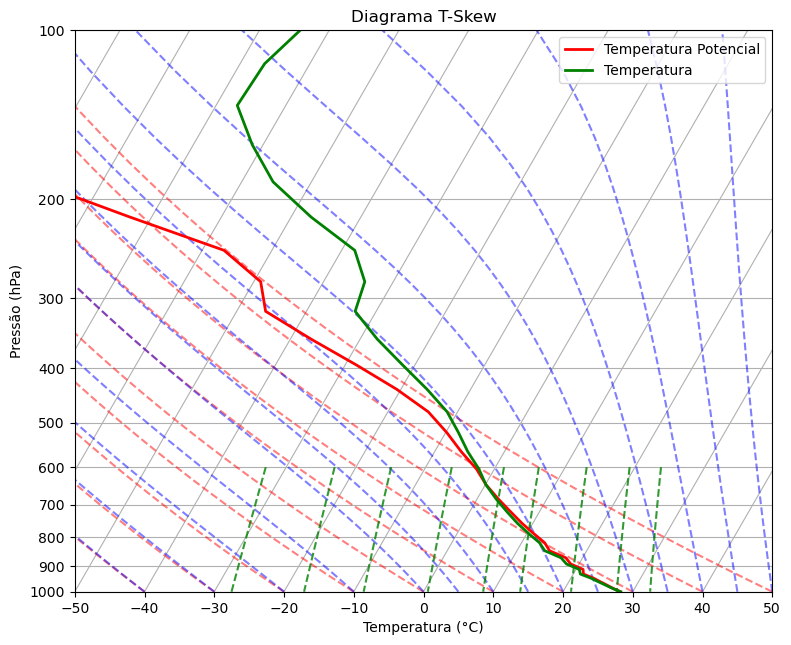

In [16]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT

# Abre o arquivo netCDF e carrega as variáveis de interesse
nc = netCDF4.Dataset("/home/l/Downloads/BAM1D_PKlast_avaliacao/BAM1D_avaliacao/saidas_figuras/bam1d.nc")
temp = np.squeeze(nc.variables["temp"][304])-273.15
press = np.squeeze(nc.variables["lev"][:])*1000

# Define a constante de calor específico do ar
cp = 1004.0

# Calcula a temperatura potencial
temp_pot = temp * (1000.0 / press) ** (2/7)

# Cria o plot skew-T
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Adiciona as variáveis ao plot skew-T
skew.plot(press, temp_pot, 'r', linewidth=2)
skew.plot(press, temp, 'g', linewidth=2)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 50)
skew.ax.set_xlabel('Temperatura (°C)')
skew.ax.set_ylabel('Pressão (hPa)')

# Adiciona linhas de referência e anotações
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.legend(['Temperatura Potencial','Temperatura'], loc='upper right')

skew.ax.set_title('Diagrama T-Skew')

# Exibe o plot skew-T
plt.show()

# Fecha o arquivo netCDF
nc.close()

In [ ]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

# Abre o arquivo netCDF e carrega as variáveis de interesse
nc = netCDF4.Dataset("/home/l/Downloads/BAM1D_PKlast_avaliacao/BAM1D_avaliacao/saidas_figuras/bam1d.nc")

temp = np.squeeze(nc.variables["temp"][314,:,:,:])#-273.15
press = np.squeeze(nc.variables["lev"][:])*1000
# Define a constante de calor específico do ar
cp = 1004.0  # Capacidade calorífica do ar a pressão constante
R = 287.0  # Constante do gás para o ar seco

# Calcula a temperatura potencial
temp_pot = temp * (1000 / press) ** (R / cp) 

plt.figure(figsize=(10, 8))
# Plota a temperatura potencial em função da pressão
plt.plot(temp_pot, press, label="\u03F4 (K)")
plt.plot(temp, press, label="Temperatura Absoluta (K)")
plt.gca().invert_yaxis()
plt.xlabel("Temperatura potencial (K)")
plt.ylabel("Pressão (hPa)")
plt.title("Temperatura potencial 314")
plt.legend()
plt.show()

# Fecha o arquivo netCDF
nc.close()